In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/zhangyueying/Desktop/S_Analytics_Value_Chain/project/features.csv')
application = pd.read_csv('/Users/zhangyueying/Desktop/S_Analytics_Value_Chain/project/home-credit-default-risk/application_train.csv')

In [6]:
def plot_continuous(df, variable, by, bin=40):
    """Function to plot the distribution of a specified variable by class in histogram.
    
    Args:
        df (DataFrame): A DataFrame with values to plot.
        variable (str): Variable of interest.
        by (str): Variable which splits data into classes.
        bin (int, optional): Bin width. Defaults to 40.
        
    """
    g = sns.FacetGrid(df, hue=by, sharex=True, sharey=True, height=6, aspect=2)
    g = g.map(plt.hist, variable, bins=bin, alpha=0.7).add_legend()
    plt.show()

## ANNUITY_CREDIT_PERC: application loan annuity/income (rate)

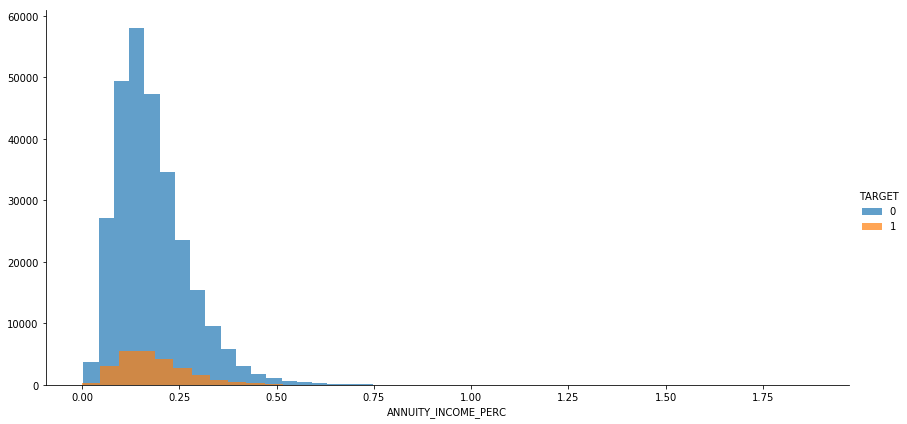

In [7]:
plot_continuous(df, 'ANNUITY_INCOME_PERC', 'TARGET')

In [8]:
df['ANNUITY_INCOME_PERC'][df.TARGET==0].describe()

count    282670.000000
mean          0.180531
std           0.094571
min           0.003333
25%           0.114143
50%           0.162280
75%           0.228433
max           1.570600
Name: ANNUITY_INCOME_PERC, dtype: float64

In [9]:
df['ANNUITY_INCOME_PERC'][df.TARGET==1].describe()

count    24825.000000
mean         0.185482
std          0.094497
min          0.000224
25%          0.120000
50%          0.169294
75%          0.233640
max          1.875965
Name: ANNUITY_INCOME_PERC, dtype: float64

## INCOME_CREDIT_PERC: income/credit (rate)

#### There is no significant difference in the distribution of income/credit between people with late payment and without late payment except that for people with late payment, the distribution is far right skewed. This observation suggests that income may not be a key indicator of predicting late payment as we usually expect.

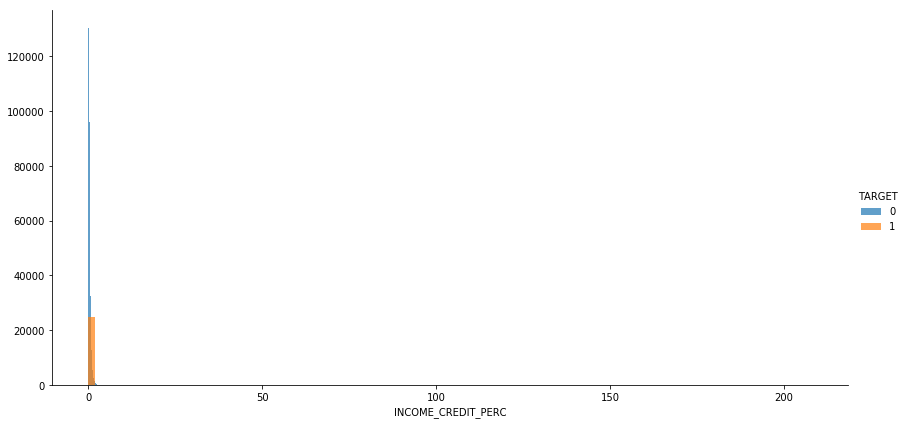

In [10]:
plot_continuous(df, 'INCOME_CREDIT_PERC', 'TARGET', 100)

In [11]:
df['INCOME_CREDIT_PERC'][df.TARGET==0].describe()

count    282682.000000
mean          0.399942
std           0.345774
min           0.020314
25%           0.192629
50%           0.306122
75%           0.499917
max          26.666800
Name: INCOME_CREDIT_PERC, dtype: float64

In [12]:
df['INCOME_CREDIT_PERC'][df.TARGET==1].describe()

count    24825.000000
mean         0.396556
std          1.354381
min          0.011801
25%          0.200334
50%          0.307395
75%          0.469388
max        208.003328
Name: INCOME_CREDIT_PERC, dtype: float64

## Income Type

#### Among those who made late payment, more than 60% of them have working as their main income type.

In [15]:
pd.value_counts(application['NAME_INCOME_TYPE']).to_frame().reset_index()

index  NAME_INCOME_TYPE
0               Working            158774
1  Commercial associate             71617
2             Pensioner             55362
3         State servant             21703
4            Unemployed                22
5               Student                18
6           Businessman                10
7       Maternity leave                 5

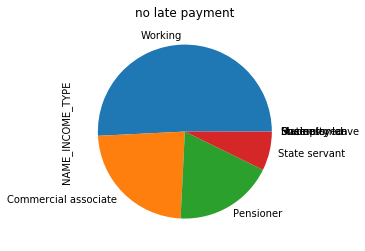

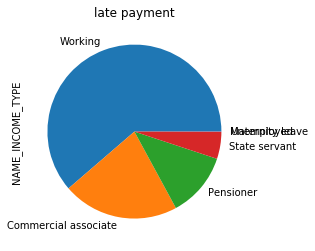

In [16]:
application['NAME_INCOME_TYPE'][application.TARGET==0].value_counts().plot(kind='pie')
plt.title('no late payment')
plt.show()

application['NAME_INCOME_TYPE'][application.TARGET==1].value_counts().plot(kind='pie')
plt.title('late payment')
plt.show()

## Education Type

#### People with higher education level are much less likely to make late payment.

In [17]:
pd.value_counts(application['NAME_EDUCATION_TYPE']).to_frame().reset_index()

index  NAME_EDUCATION_TYPE
0  Secondary / secondary special               218391
1               Higher education                74863
2              Incomplete higher                10277
3                Lower secondary                 3816
4                Academic degree                  164

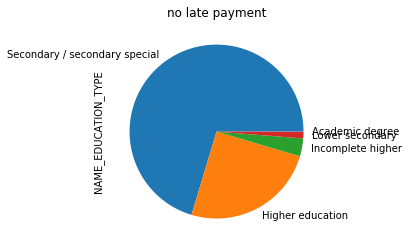

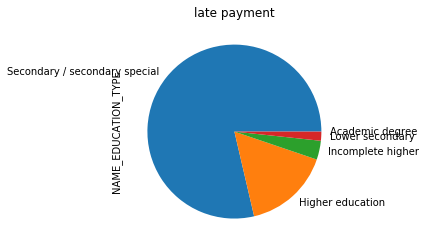

In [18]:
application['NAME_EDUCATION_TYPE'][application.TARGET==0].value_counts().plot(kind='pie')
plt.title('no late payment')
plt.show()
application['NAME_EDUCATION_TYPE'][application.TARGET==1].value_counts().plot(kind='pie')
plt.title('late payment')
plt.show()

## External Source Score: Score from other institutions 

#### We can observed significant difference in distribution of people with late payment and people without late payment. However, due to the unspecified meaning of the features, the external score is not used in modeling.

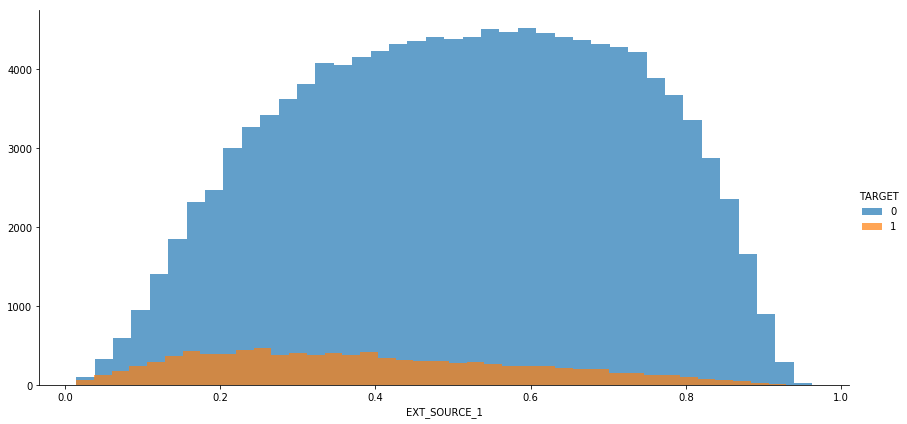

In [19]:
plot_continuous(df, 'EXT_SOURCE_1', 'TARGET')

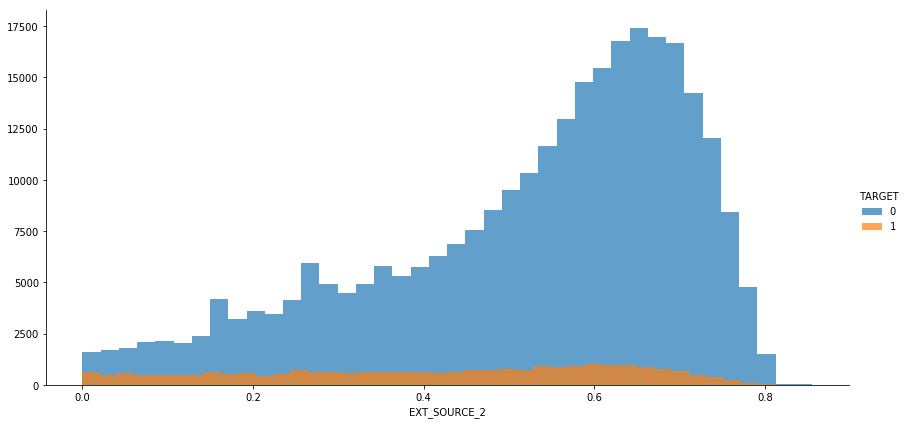

In [20]:
plot_continuous(df, 'EXT_SOURCE_2', 'TARGET')

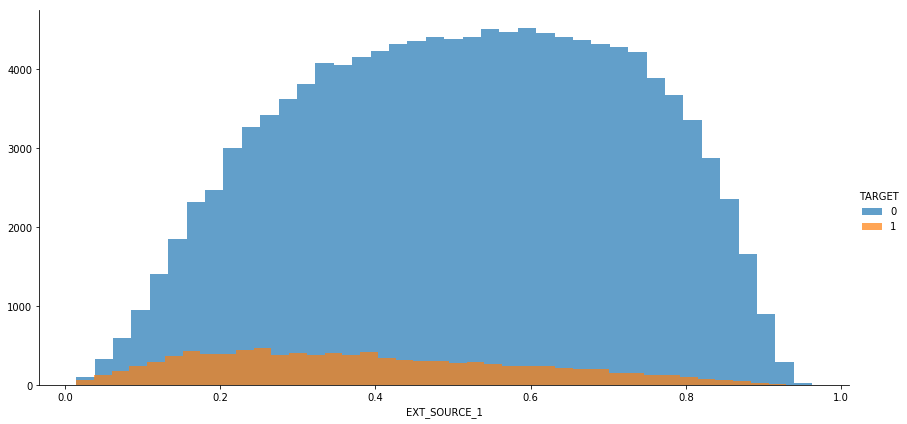

In [21]:
plot_continuous(df, 'EXT_SOURCE_1', 'TARGET')

## Days_ID_Publish: how many days before the application did client change the identity document with which he applied for the loan (days)

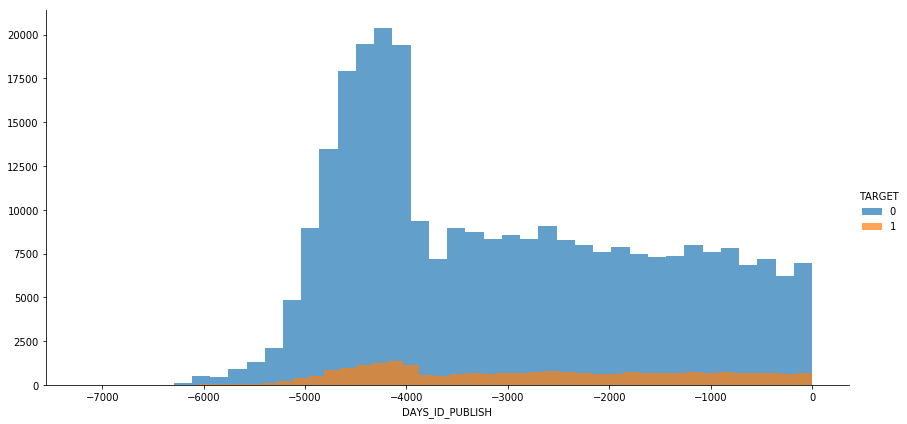

In [22]:
plot_continuous(df, 'DAYS_ID_PUBLISH', 'TARGET')

In [44]:
df['DAYS_ID_PUBLISH'][df.TARGET==0].describe()

count    282682.000000
mean      -3017.219349
std        1506.618579
min       -7197.000000
25%       -4313.000000
50%       -3295.000000
75%       -1755.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [45]:
df['DAYS_ID_PUBLISH'][df.TARGET==1].describe()

count    24825.000000
mean     -2732.099617
std       1516.975313
min      -6207.000000
25%      -4119.000000
50%      -2797.000000
75%      -1392.000000
max          0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

## Days_Registration: how many days before the application did client change his registration (days)

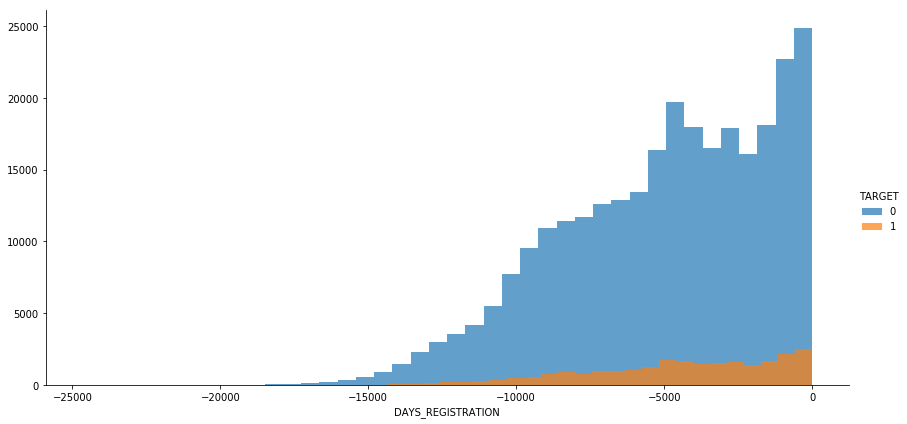

In [25]:
plot_continuous(df, 'DAYS_REGISTRATION', 'TARGET')

## DAYS_LAST_PHONE_CHANGE: how many days before application did client change phone (days)

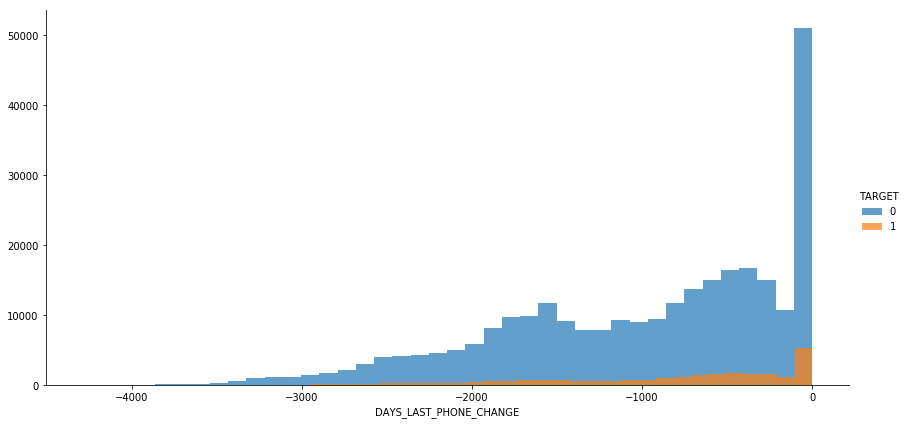

In [26]:
plot_continuous(df, 'DAYS_LAST_PHONE_CHANGE', 'TARGET')

In [46]:
df['DAYS_LAST_PHONE_CHANGE'][df.TARGET==0].describe()

count    282681.000000
mean       -976.390398
std         831.214018
min       -4292.000000
25%       -1586.000000
50%        -776.000000
75%        -281.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [47]:
df['DAYS_LAST_PHONE_CHANGE'][df.TARGET==1].describe()

count    24825.000000
mean      -808.796818
std        758.090713
min      -4070.000000
25%      -1301.000000
50%       -594.000000
75%       -194.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### People with late payment change their identity, phone, registration more recently.

## PAYMENT_RATE: annuity / credit  (rate)

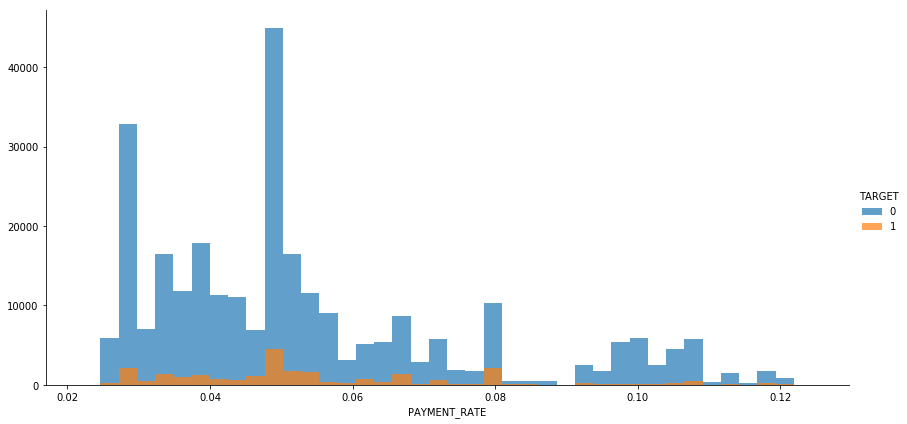

In [29]:
plot_continuous(df, 'PAYMENT_RATE', 'TARGET')

## BURO_DAYS_CREDIT_MEAN: how many days before current application did client apply for Credit Bureau credit (take mean)  (days)

#### From the distribution, people with late payment applied for credit bureau credit more recently

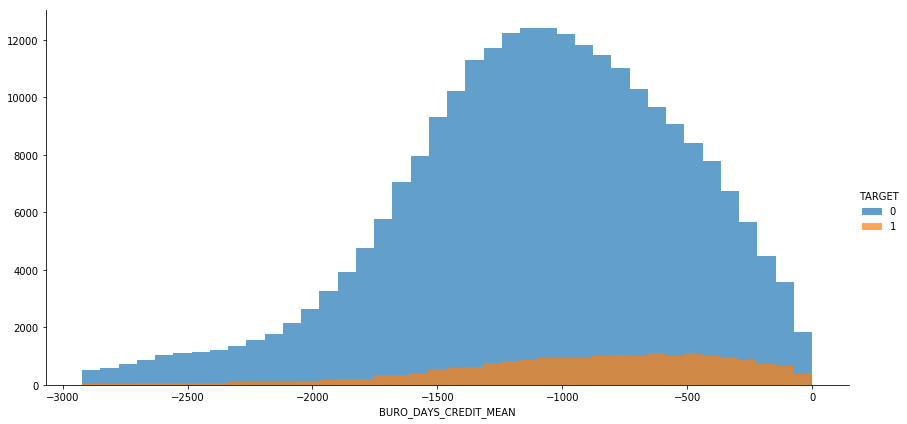

In [30]:
plot_continuous(df, 'BURO_DAYS_CREDIT_MEAN', 'TARGET')

## BURO_DAYS_CREDIT_ENDDATE_MEANï¼šmean of remaining duration of CB credit at the time of application (days)

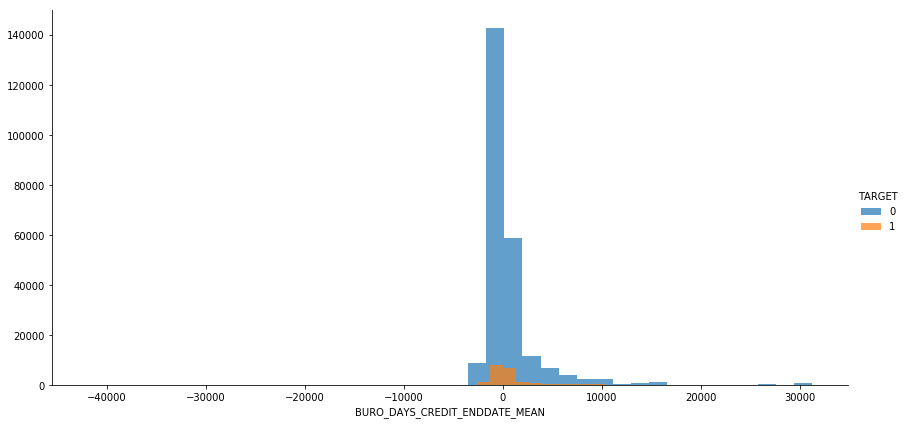

In [31]:
plot_continuous(df, 'BURO_DAYS_CREDIT_ENDDATE_MEAN', 'TARGET')

## INSTAL_DAYS_ENTRY_PAYMENT_MEAN: when was the installments of previous credit paid actually (relative to application date of current loan) (take mean)

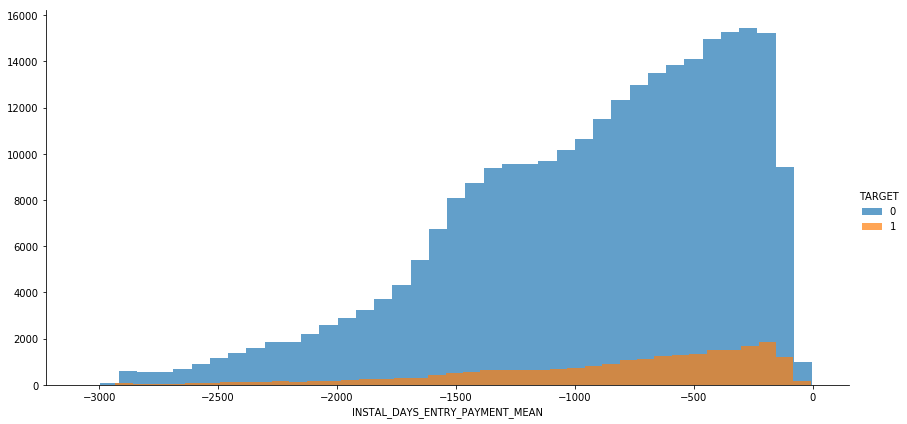

In [32]:
plot_continuous(df, 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN', 'TARGET')

## INSTAL_DBD_MEAN: mean of installments "should be paid day" - "actually be paid day" (days)

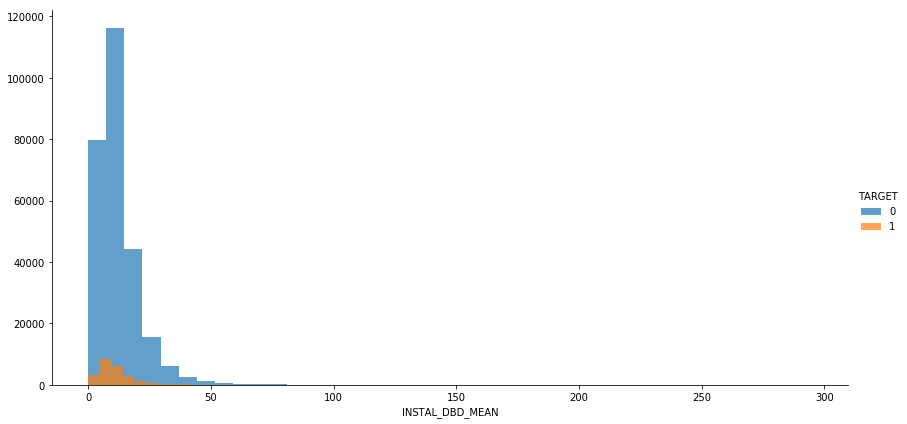

In [33]:
plot_continuous(df, 'INSTAL_DBD_MEAN', 'TARGET')

## INSTAL_AMT_PAYMENT_MEAN: mean of what the client actually paid on previous credit on this installment (dollar)

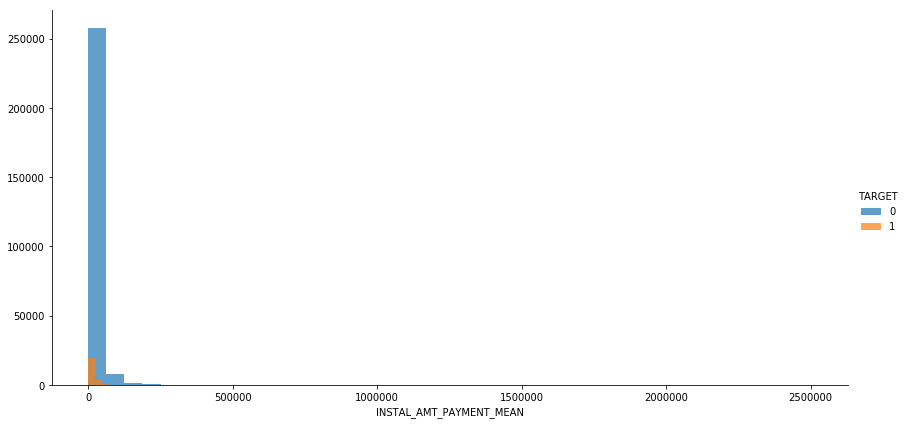

In [34]:
plot_continuous(df, 'INSTAL_AMT_PAYMENT_MEAN', 'TARGET')

In [39]:
df['INSTAL_AMT_PAYMENT_MEAN'][df.TARGET==0].describe()

count    2.677560e+05
mean     1.892806e+04
std      2.543347e+04
min      1.890000e-01
25%      7.569232e+03
50%      1.233980e+04
75%      2.153037e+04
max      2.504590e+06
Name: INSTAL_AMT_PAYMENT_MEAN, dtype: float64

In [40]:
df['INSTAL_AMT_PAYMENT_MEAN'][df.TARGET==1].describe()

count     23875.000000
mean      16806.387728
std       20983.040483
min          31.320000
25%        6572.461764
50%       10984.556471
75%       19321.205790
max      904451.175000
Name: INSTAL_AMT_PAYMENT_MEAN, dtype: float64

## APPROVED_DAYS_DECISION_MEAN: mean of relative to current application when was the decision about previous approved application made (days)

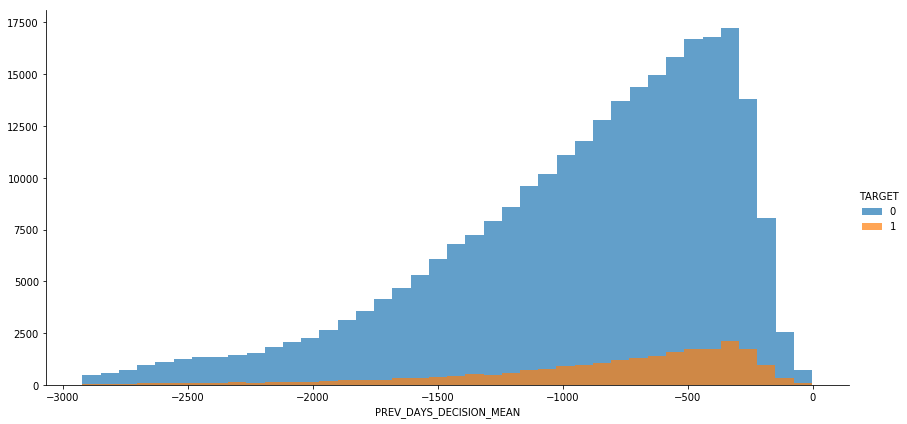

In [35]:
plot_continuous(df, 'PREV_DAYS_DECISION_MEAN', 'TARGET')

## Social Surroundings Default 30/60 Days (cases)

#### On average, the default cases around people with no late payment is less. However, for very few people with no late payment, there exist extreme cases where their social surroudings have more than 20 defaults. 

In [36]:
df[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE
count             306486.000000             306486.000000
mean                   0.143406                  0.100034
std                    0.446644                  0.362221
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                   34.000000                 24.000000

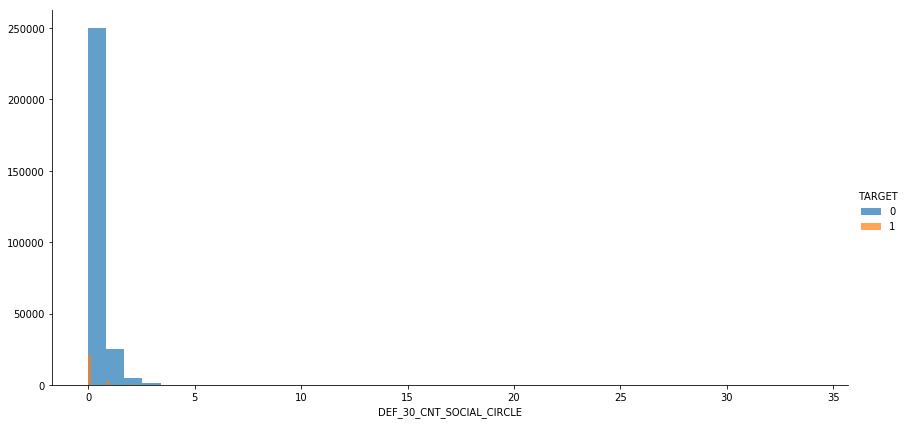

In [37]:
plot_continuous(df, 'DEF_30_CNT_SOCIAL_CIRCLE', 'TARGET')

In [50]:
df['DEF_30_CNT_SOCIAL_CIRCLE'][df.TARGET==0].describe()

count    281697.000000
mean          0.139132
std           0.439708
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [51]:
df['DEF_30_CNT_SOCIAL_CIRCLE'][df.TARGET==1].describe()

count    24789.000000
mean         0.191980
std          0.516524
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

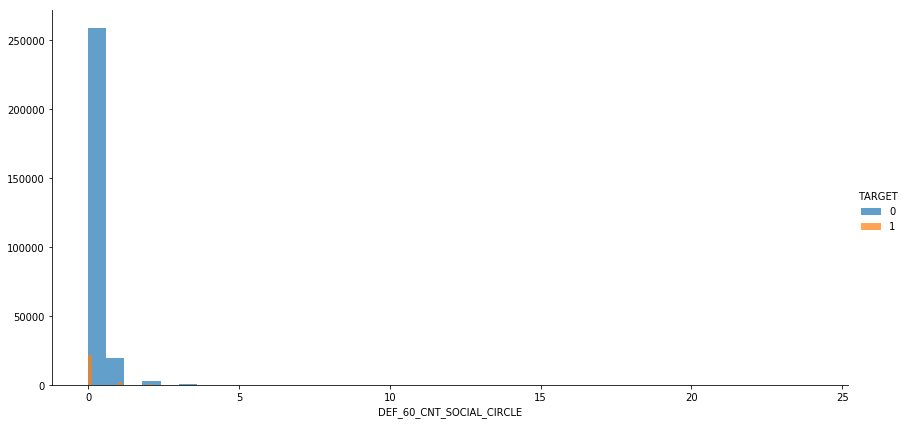

In [38]:
plot_continuous(df, 'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET')

In [52]:
df['DEF_60_CNT_SOCIAL_CIRCLE'][df.TARGET==0].describe()

count    281697.000000
mean          0.096671
std           0.355693
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [53]:
df['DEF_60_CNT_SOCIAL_CIRCLE'][df.TARGET==1].describe()

count    24789.000000
mean         0.138247
std          0.427645
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64